# Boxcar for Image-Derived Input Functions

## Setup

In [1]:
# system functions that are always useful to have
import time, sys, os

# basic numeric setup
import numpy as np

# inline plotting
%matplotlib inline

# plotting
import matplotlib
from matplotlib import pyplot as plt

# seed the random number generator
rstate = np.random.default_rng(916301)

In [2]:
# re-defining plotting defaults
from matplotlib import rcParams
rcParams.update({'xtick.major.pad': '7.0'})
rcParams.update({'xtick.major.size': '7.5'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '7.0'})
rcParams.update({'xtick.minor.size': '3.5'})
rcParams.update({'xtick.minor.width': '1.0'})
rcParams.update({'ytick.major.pad': '7.0'})
rcParams.update({'ytick.major.size': '7.5'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '7.0'})
rcParams.update({'ytick.minor.size': '3.5'})
rcParams.update({'ytick.minor.width': '1.0'})
rcParams.update({'font.size': 30})

In [3]:
import dynesty
from Boxcar import Boxcar

In [4]:
# define model
input_func_measurement = '/Volumes/PrecunealSSD/Singularity/CCIR_01211/derivatives/sub-108293/ses-20210421150523/pet/sub-108293_ses-20210421150523_trc-oo_proc-MipIdif_idif.nii.gz'
assert os.path.isfile(input_func_measurement), f"{input_func_measurement} was not found."
bc = Boxcar(input_func_measurement)
bc.data

<function Boxcar.Boxcar.data(v)>

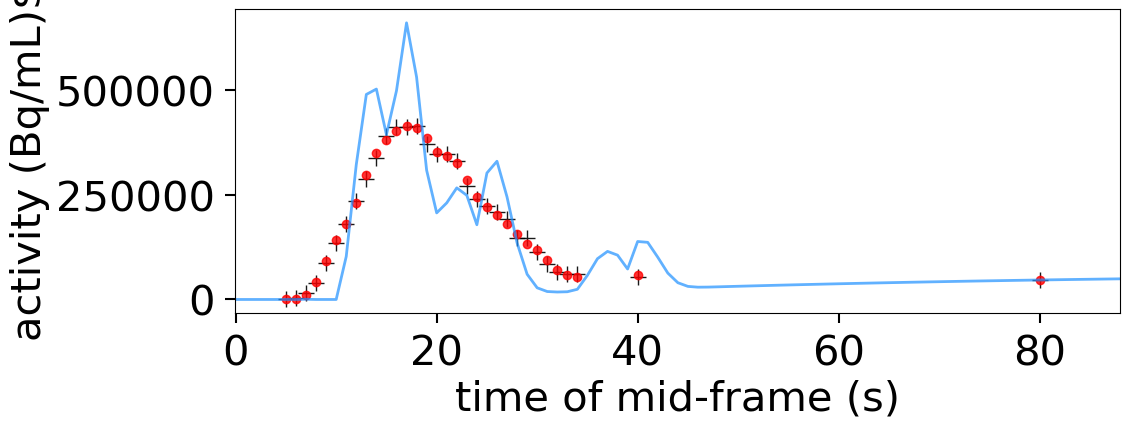

In [5]:
bc.plot_truths()

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

In [ ]:
# sample
sampler = dynesty.DynamicNestedSampler(bc.loglike, bc.prior_transform, 14, 
                                sample='rslice', nlive=2000,
                                rstate=rstate)
sampler.run_nested(checkpoint_file=bc.fqfp+"_dynesty-Boxcar.save")
res = sampler.results

In [ ]:
from dynesty import plotting as dyplot

dyplot.runplot(res)
plt.tight_layout()

In [ ]:
labels = bc.labels
truths = bc.truths
fig, axes = dyplot.traceplot(res, labels=labels, truths=truths,
                             fig=plt.subplots(14, 2, figsize=(16, 50)))
fig.tight_layout()

In [ ]:
fig, axes = dyplot.cornerplot(res, truths=truths, show_titles=True, 
                              title_kwargs={'y': 1.04}, labels=labels,
                              fig=plt.subplots(14, 14, figsize=(100, 100)))

In [ ]:
res

In [ ]:
res.keys()

In [ ]:
from dynesty import utils as dyutils

samples = res['samples'].T
weights = res.importance_weights()
for i, x in enumerate(samples):
    ql, qm, qh = dyutils.quantile(x, [0.025, 0.5, 0.975], weights=weights)
    print(f"Parameter {i+1}: {qm:.3f} [{ql:.3f}, {qh:.3f}]")